In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, ParameterGrid
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn import preprocessing
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from matplotlib import cycler
plt.style.use('fivethirtyeight')

colors = ['#16b713', '#1A8FE3', '#38369A',
          '#9810B3', '#D11149', '#FF6201', '#f3ba07']
plt.rc('axes', prop_cycle=cycler('color', colors))


In [3]:
df = pd.read_csv('../data/cleaned.csv')


In [4]:
df["date"] = pd.to_datetime(df["date"])
df["day_of_week"] = df["date"].dt.dayofweek

In [5]:
df["day_of_week"] = df["date"].dt.dayofweek
print(df)

          date  contest_num   word  num_results  num_hardmode  in1  in2  in3  \
0   2022-01-07          202  slump        80630          1362    1    3   23   
1   2022-01-08          203  crank       101503          1763    1    5   23   
2   2022-01-09          204  gorge        91477          1913    1    3   13   
3   2022-01-10          205  query       107134          2242    1    4   16   
4   2022-01-11          206  drink       153880          3017    1    9   35   
..         ...          ...    ...          ...           ...  ...  ...  ...   
354 2022-12-27          556  condo        20879          2012    0    2   17   
355 2022-12-28          557  impel        20160          1937    0    3   21   
356 2022-12-29          558  havoc        20001          1919    0    2   16   
357 2022-12-30          559  molar        21204          1973    0    4   21   
358 2022-12-31          560  manly        20380          1899    0    2   17   

     in4  in5  ...  letter2_int  letter

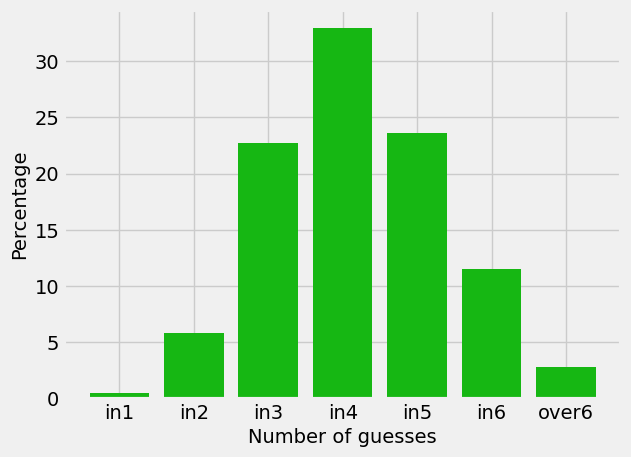

In [6]:
fig, ax = plt.subplots()

guesses = ['in1', 'in2', 'in3', 'in4', 'in5', 'in6', 'over6']

percentages = np.array([df['in1'], df['in2'], df['in3'], df['in4'], df['in5'], df['in6'], df['over6']])

ax.bar(guesses, percentages.mean(axis=1))

ax.set_xlabel('Number of guesses')
ax.set_ylabel('Percentage')


plt.show()

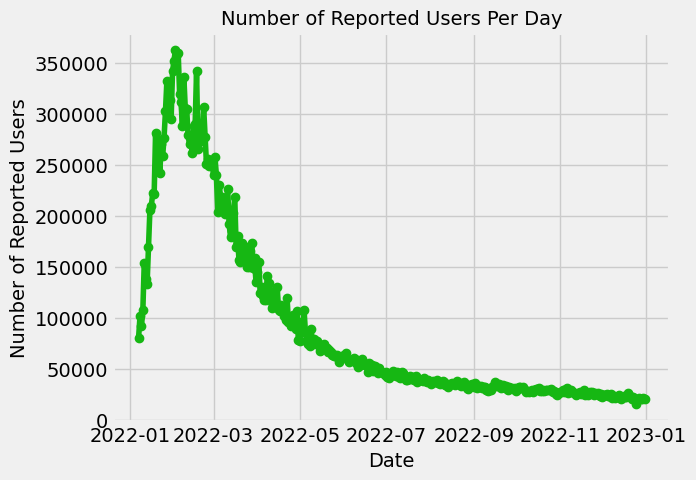

In [21]:
plt.plot(df['date'], df['num_results'], marker='o')
plt.title('Number of Reported Users Per Day', fontsize=14)
plt.xlabel("Date")
plt.ylabel("Number of Reported Users")
plt.grid(True)
plt.show()


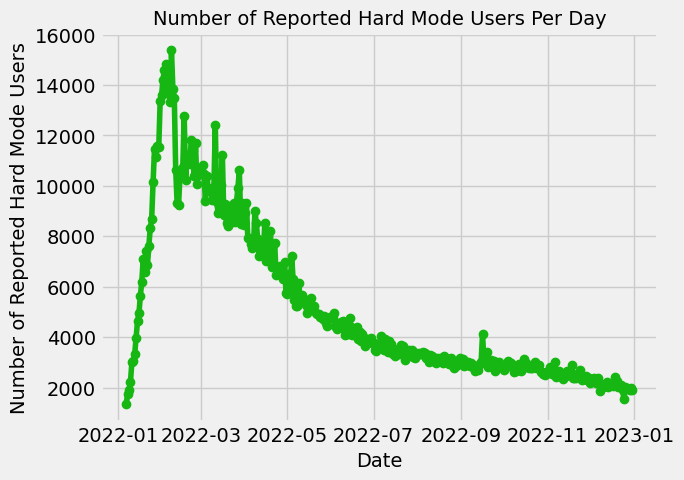

In [34]:
plt.plot(df['date'], df['num_hardmode'], marker='o')
plt.title('Number of Reported Hard Mode Users Per Day', fontsize=14)
plt.xlabel("Date")
plt.ylabel("Number of Reported Hard Mode Users")
plt.grid(True)
plt.show()


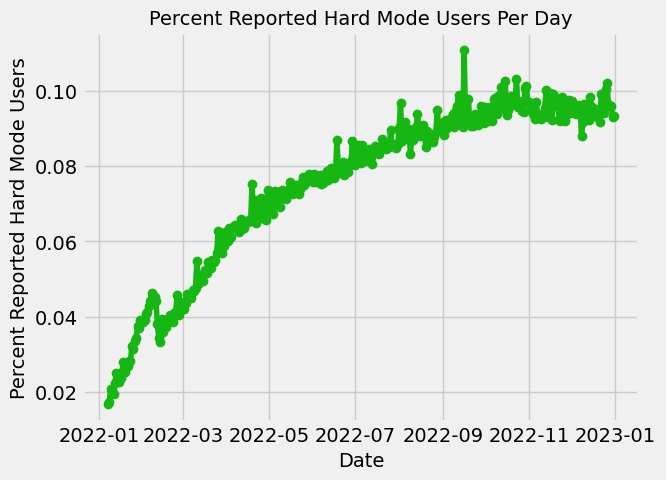

,date,contest_num,word,num_results,num_hardmode,in1,in2,in3,in4,in5,...,letter3_int,letter4_int,letter5_int,avg_num_guesses,day_of_week,word_score,word_occurrence,vowels,repeats,percent_hard


In [35]:
df["percent_hard"] = df.apply(
    lambda row: row["num_hardmode"]/row["num_results"], axis=1)

plt.plot(df['date'], df['percent_hard'], marker='o')
plt.title('Percent Reported Hard Mode Users Per Day', fontsize=14)
plt.xlabel("Date")
plt.ylabel("Percent Reported Hard Mode Users")
plt.grid(True)
plt.show()


df[df["percent_hard"] > 0.5]


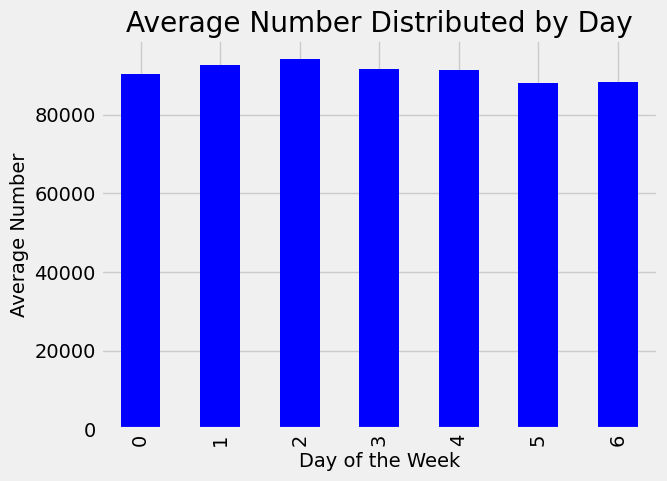

In [8]:
grouped = df.groupby('day_of_week')['num_results'].mean()

# Plot a bar chart with the grouped data
grouped.plot(kind='bar', color='blue')

# Add labels and title to the plot
plt.xlabel('Day of the Week')
plt.ylabel('Average Number')
plt.title('Average Number Distributed by Day')
plt.show()


In [47]:
from prophet import Prophet

df_numpeople_predict = df[["date", "num_results"]]
df_numpeople_predict.columns = ['ds', 'y']
m = Prophet()

m.fit(df_numpeople_predict)

future = m.make_future_dataframe(periods=365)

forecast = m.predict(future)
forecast.tail()



14:50:12 - cmdstanpy - INFO - Chain [1] start processing
14:50:12 - cmdstanpy - INFO - Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
719,2023-12-27,-24815.542418,-825851.877542,802733.516035,-814112.616353,793955.429438,3741.120877,3741.120877,3741.120877,3741.120877,3741.120877,3741.120877,0.0,0.0,0.0,-21074.421542
720,2023-12-28,-24938.622838,-813872.910682,791262.410089,-820369.082040,797715.148350,1621.514318,1621.514318,1621.514318,1621.514318,1621.514318,1621.514318,0.0,0.0,0.0,-23317.108520
721,2023-12-29,-25061.703258,-820104.987556,794661.049953,-826342.832666,802487.693777,142.515062,142.515062,142.515062,142.515062,142.515062,142.515062,0.0,0.0,0.0,-24919.188195
722,2023-12-30,-25184.783677,-839321.442159,803649.950990,-830434.394112,808273.065721,-2673.849841,-2673.849841,-2673.849841,-2673.849841,-2673.849841,-2673.849841,0.0,0.0,0.0,-27858.633518
723,2023-12-31,-25307.864097,-833671.806879,795267.812158,-833088.032968,812766.351775,-3526.252410,-3526.252410,-3526.252410,-3526.252410,-3526.252410,-3526.252410,0.0,0.0,0.0,-28834.116507


In [49]:
# Split the data into training and test sets
train_size = int(len(df_numpeople_predict) * 0.8)
train_data, test_data = df_numpeople_predict[:train_size], df_numpeople_predict[train_size:]

# Define the hyperparameters to tune
hyperparameters = {
    'seasonality_mode': ['additive', 'multiplicative'],
    'changepoint_prior_scale': [0.01, 0.1, 1, 10]
}

# Define the search space
search_space = ParameterGrid(hyperparameters)

# Train and evaluate the model for each hyperparameter combination
best_mape = float('inf')
for params in search_space:
    model = Prophet(seasonality_mode=params['seasonality_mode'],
                    changepoint_prior_scale=params['changepoint_prior_scale'])
    model.fit(train_data)

    future_dates = model.make_future_dataframe(
        periods=len(test_data), freq='D')
    predictions = model.predict(future_dates)[-len(test_data):]

    mape = mean_absolute_percentage_error(test_data['y'], predictions['yhat'])
    print('Hyperparameters: {}, MAPE: {}'.format(params, mape))

    if mape < best_mape:
        best_mape = mape
        best_params = params

print('Best hyperparameters: {}, MAPE: {}'.format(best_params, best_mape))


14:50:33 - cmdstanpy - INFO - Chain [1] start processing
14:50:33 - cmdstanpy - INFO - Chain [1] done processing
14:50:33 - cmdstanpy - INFO - Chain [1] start processing
14:50:34 - cmdstanpy - INFO - Chain [1] done processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'seasonality_mode': 'additive'}, MAPE: 3.527011476492499
Hyperparameters: {'changepoint_prior_scale': 0.01, 'seasonality_mode': 'multiplicative'}, MAPE: 3.5276980079625258


14:50:34 - cmdstanpy - INFO - Chain [1] start processing
14:50:34 - cmdstanpy - INFO - Chain [1] done processing
14:50:34 - cmdstanpy - INFO - Chain [1] start processing
14:50:34 - cmdstanpy - INFO - Chain [1] done processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'seasonality_mode': 'additive'}, MAPE: 0.09983115319591811


14:50:34 - cmdstanpy - INFO - Chain [1] start processing
14:50:34 - cmdstanpy - INFO - Chain [1] done processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'seasonality_mode': 'multiplicative'}, MAPE: 0.06830091336961502


14:50:34 - cmdstanpy - INFO - Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 1, 'seasonality_mode': 'additive'}, MAPE: 0.08618306328659214


14:50:35 - cmdstanpy - INFO - Chain [1] done processing
14:50:35 - cmdstanpy - INFO - Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 1, 'seasonality_mode': 'multiplicative'}, MAPE: 0.051241161126301525


14:50:35 - cmdstanpy - INFO - Chain [1] done processing
14:50:35 - cmdstanpy - INFO - Chain [1] start processing
14:50:35 - cmdstanpy - INFO - Chain [1] done processing


Hyperparameters: {'changepoint_prior_scale': 10, 'seasonality_mode': 'additive'}, MAPE: 0.08640995575580906
Hyperparameters: {'changepoint_prior_scale': 10, 'seasonality_mode': 'multiplicative'}, MAPE: 0.053183901037421565
Best hyperparameters: {'changepoint_prior_scale': 1, 'seasonality_mode': 'multiplicative'}, MAPE: 0.051241161126301525


In [51]:
m = Prophet(seasonality_mode='multiplicative',
            changepoint_prior_scale=1)

m.fit(train_data)

future = m.make_future_dataframe(periods=150)

forecast = m.predict(future)
forecast.tail()

forecast[forecast["ds"] == '2023-03-01']


14:54:03 - cmdstanpy - INFO - Chain [1] start processing
14:54:03 - cmdstanpy - INFO - Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,weekly,weekly_lower,weekly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
418,2023-03-01,15363.792378,-704576.500789,689551.707359,-674088.286803,666480.171314,0.038472,0.038472,0.038472,0.038472,0.038472,0.038472,0.0,0.0,0.0,15954.871923


In [43]:
forecast[forecast["ds"] == '2023-03-01']


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,weekly,weekly_lower,weekly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
418,2023-03-01,0.116905,0.059103,0.179389,0.059435,0.179946,-0.003017,-0.003017,-0.003017,-0.003017,-0.003017,-0.003017,0.0,0.0,0.0,0.116553


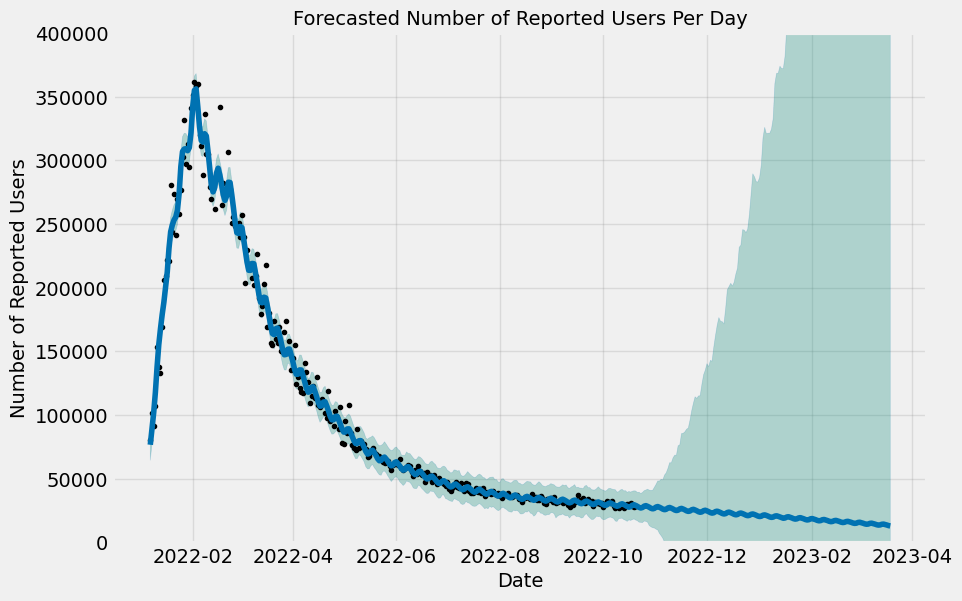

In [33]:
# Plot the forecast
fig, ax = plt.subplots(figsize=(10, 6))
model.plot(forecast, ax=ax)

# Add shaded regions for the uncertainty intervals
ax.fill_between(forecast['ds'], forecast['yhat_lower'],
                forecast['yhat_upper'], alpha=0.1)
ax.set_ylim([0, 400000])
# Set plot title and axis labels
plt.title('Forecasted Number of Reported Users Per Day', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Number of Reported Users')
plt.show()

In [52]:
df_ratio_predict = df[["date", "percent_hard"]]
df_ratio_predict.columns = ['ds', 'y']

# Split the data into training and test sets
train_size = int(len(df_ratio_predict) * 0.8)
train_data, test_data = df_ratio_predict[:
                                         train_size], df_ratio_predict[train_size:]

# Define the hyperparameters to tune
hyperparameters = {
    'seasonality_mode': ['additive', 'multiplicative'],
    'changepoint_prior_scale': [0.01, 0.1, 1, 10]
}

# Define the search space
search_space = ParameterGrid(hyperparameters)

# Train and evaluate the model for each hyperparameter combination
best_mape = float('inf')
for params in search_space:
    model = Prophet(seasonality_mode=params['seasonality_mode'],
                    changepoint_prior_scale=params['changepoint_prior_scale'])
    model.fit(train_data)

    future_dates = model.make_future_dataframe(
        periods=len(test_data), freq='D')
    predictions = model.predict(future_dates)[-len(test_data):]

    mape = mean_absolute_percentage_error(test_data['y'], predictions['yhat'])
    print('Hyperparameters: {}, MAPE: {}'.format(params, mape))

    if mape < best_mape:
        best_mape = mape
        best_params = params

print('Best hyperparameters: {}, MAPE: {}'.format(best_params, best_mape))


14:59:39 - cmdstanpy - INFO - Chain [1] start processing
14:59:39 - cmdstanpy - INFO - Chain [1] done processing
14:59:40 - cmdstanpy - INFO - Chain [1] start processing
14:59:40 - cmdstanpy - INFO - Chain [1] done processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'seasonality_mode': 'additive'}, MAPE: 0.09437738989364157


14:59:40 - cmdstanpy - INFO - Chain [1] start processing
14:59:40 - cmdstanpy - INFO - Chain [1] done processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'seasonality_mode': 'multiplicative'}, MAPE: 0.0946208421221146


14:59:40 - cmdstanpy - INFO - Chain [1] start processing
14:59:40 - cmdstanpy - INFO - Chain [1] done processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'seasonality_mode': 'additive'}, MAPE: 0.07187991401108337


14:59:40 - cmdstanpy - INFO - Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'seasonality_mode': 'multiplicative'}, MAPE: 0.07252734836921342


14:59:40 - cmdstanpy - INFO - Chain [1] done processing
14:59:41 - cmdstanpy - INFO - Chain [1] start processing
14:59:41 - cmdstanpy - INFO - Chain [1] done processing


Hyperparameters: {'changepoint_prior_scale': 1, 'seasonality_mode': 'additive'}, MAPE: 0.08186856848586982


14:59:41 - cmdstanpy - INFO - Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 1, 'seasonality_mode': 'multiplicative'}, MAPE: 0.0817903843752757


14:59:41 - cmdstanpy - INFO - Chain [1] done processing
14:59:41 - cmdstanpy - INFO - Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 10, 'seasonality_mode': 'additive'}, MAPE: 0.08414435811366976


14:59:41 - cmdstanpy - INFO - Chain [1] done processing


Hyperparameters: {'changepoint_prior_scale': 10, 'seasonality_mode': 'multiplicative'}, MAPE: 0.0845791582108846
Best hyperparameters: {'changepoint_prior_scale': 0.1, 'seasonality_mode': 'additive'}, MAPE: 0.07187991401108337


14:59:44 - cmdstanpy - INFO - Chain [1] start processing
14:59:44 - cmdstanpy - INFO - Chain [1] done processing


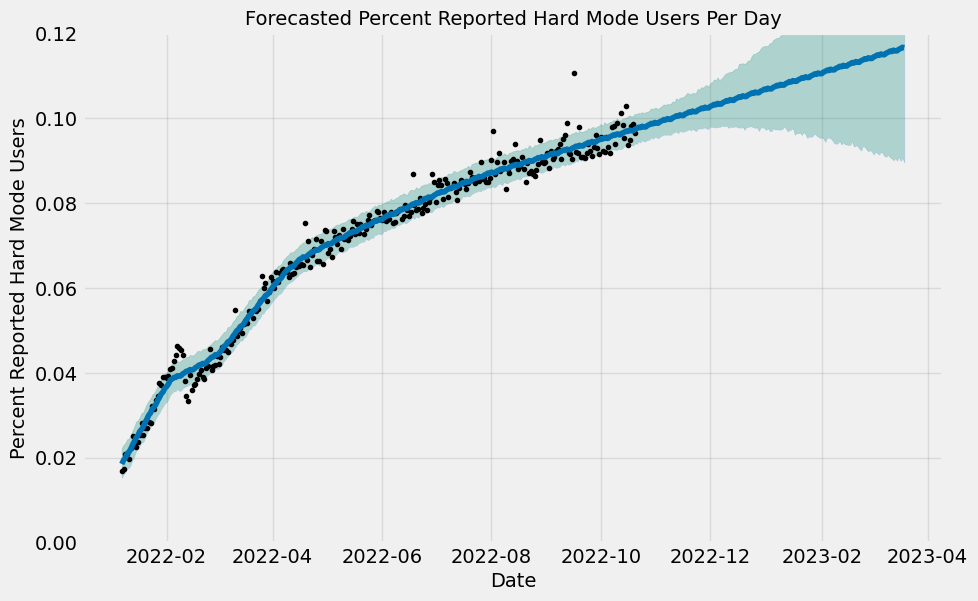

In [53]:
m = Prophet(seasonality_mode='additive',
            changepoint_prior_scale=0.1)

m.fit(train_data)

future = m.make_future_dataframe(periods=150)

forecast = m.predict(future)

# Plot the forecast
fig, ax = plt.subplots(figsize=(10, 6))
model.plot(forecast, ax=ax)

# Add shaded regions for the uncertainty intervals
ax.fill_between(forecast['ds'], forecast['yhat_lower'],
                forecast['yhat_upper'], alpha=0.1)
ax.set_ylim([0, .12])
# Set plot title and axis labels

plt.title('Forecasted Percent Reported Hard Mode Users Per Day', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Percent Reported Hard Mode Users')
plt.show()


In [54]:
forecast[forecast["ds"] == '2023-03-01']


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
418,2023-03-01,0.114255,0.092072,0.137074,0.092409,0.137621,-0.000244,-0.000244,-0.000244,-0.000244,-0.000244,-0.000244,0.0,0.0,0.0,0.114011


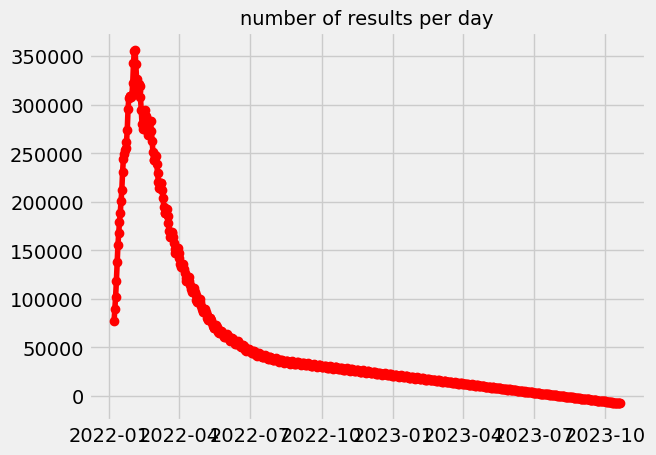

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,weekly,weekly_lower,weekly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
418,2023-03-01,15363.792378,-680917.229201,628709.903738,-653317.073161,603911.251768,0.038472,0.038472,0.038472,0.038472,0.038472,0.038472,0.0,0.0,0.0,15954.871923


In [12]:
plt.plot(forecast['ds'], forecast['yhat'], color='red', marker='o')
plt.title('number of results per day', fontsize=14)
plt.grid(True)
plt.show()

forecast[forecast.ds == "2023-03-01"]


12:40:20 - cmdstanpy - INFO - Chain [1] start processing
12:40:20 - cmdstanpy - INFO - Chain [1] done processing


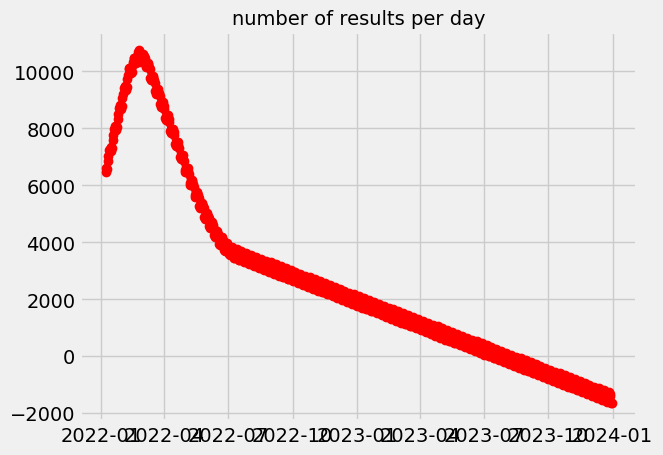

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
418,2023-03-01,1405.695082,-248.988293,3358.449422,278.250481,2425.71096,161.495001,161.495001,161.495001,161.495001,161.495001,161.495001,0.0,0.0,0.0,1567.190083


In [13]:
df_numpeople_predict = df[["date", "num_hardmode"]]
df_numpeople_predict.columns = ['ds', 'y']
m = Prophet()
m.fit(df_numpeople_predict)

future = m.make_future_dataframe(periods=365)

forecast = m.predict(future)
forecast.tail()

plt.plot(forecast['ds'], forecast['yhat'], color='red', marker='o')
plt.title('number of results per day', fontsize=14)
plt.grid(True)
plt.show()

forecast[forecast.ds == "2023-03-01"]


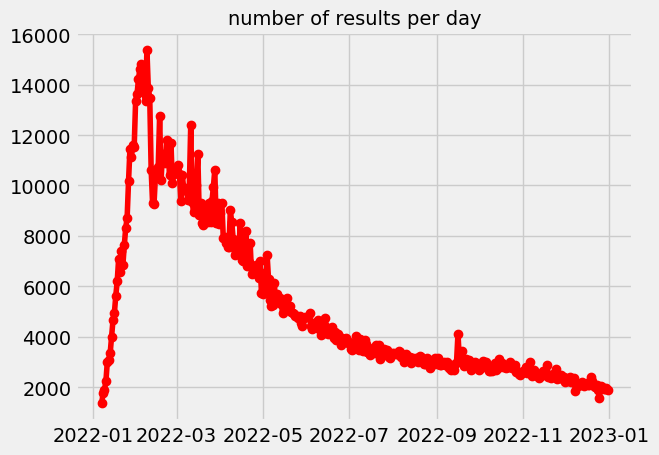

In [14]:
plt.plot(df['date'], df['num_hardmode'], color='red', marker='o')
plt.title('number of results per day', fontsize=14)
plt.grid(True)
plt.show()


In [15]:
print(df)

          date  contest_num   word  num_results  num_hardmode  in1  in2  in3  \
0   2022-01-07          202  slump        80630          1362    1    3   23   
1   2022-01-08          203  crank       101503          1763    1    5   23   
2   2022-01-09          204  gorge        91477          1913    1    3   13   
3   2022-01-10          205  query       107134          2242    1    4   16   
4   2022-01-11          206  drink       153880          3017    1    9   35   
..         ...          ...    ...          ...           ...  ...  ...  ...   
354 2022-12-27          556  condo        20879          2012    0    2   17   
355 2022-12-28          557  impel        20160          1937    0    3   21   
356 2022-12-29          558  havoc        20001          1919    0    2   16   
357 2022-12-30          559  molar        21204          1973    0    4   21   
358 2022-12-31          560  manly        20380          1899    0    2   17   

     in4  in5  ...  letter2_int  letter

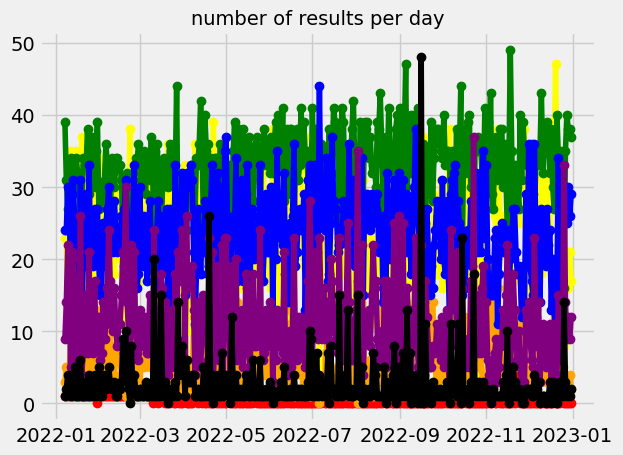

In [16]:
plt.plot(df['date'], df['in1'], color='red', marker='o')
plt.plot(df['date'], df['in2'], color='orange', marker='o')
plt.plot(df['date'], df['in3'], color='yellow', marker='o')
plt.plot(df['date'], df['in4'], color='green', marker='o')
plt.plot(df['date'], df['in5'], color='blue', marker='o')
plt.plot(df['date'], df['in6'], color='purple', marker='o')
plt.plot(df['date'], df['over6'], color='black', marker='o')
plt.title('number of results per day', fontsize=14)
plt.grid(True)
plt.show()


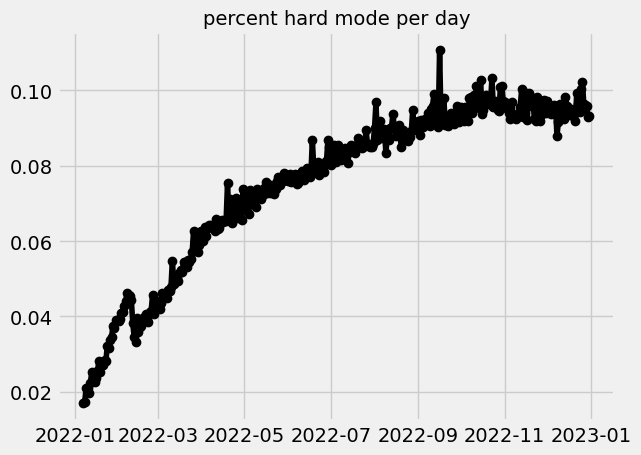

,date,contest_num,word,num_results,num_hardmode,in1,in2,in3,in4,in5,...,letter3_int,letter4_int,letter5_int,avg_num_guesses,day_of_week,word_score,word_occurrence,vowels,repeats,percent_hard


In [17]:
df["percent_hard"] = df.apply(
    lambda row: row["num_hardmode"]/row["num_results"], axis=1)

plt.plot(df['date'], df['percent_hard'], color='black', marker='o')
plt.title('percent hard mode per day', fontsize=14)
plt.grid(True)
plt.show()


df[df["percent_hard"] > 0.5]


In [18]:
from fitter import Fitter
print(df)
f = Fitter(df["num_results"].values, df["contest_num"].values)
f.fit()
print(f.summary())
f.plot_pdf()

f = Fitter(df["percent_hard"].values, df["contest_num"].values)
f.fit()
print(f.summary())
f.plot_pdf()


          date  contest_num   word  num_results  num_hardmode  in1  in2  in3  \
0   2022-01-07          202  slump        80630          1362    1    3   23   
1   2022-01-08          203  crank       101503          1763    1    5   23   
2   2022-01-09          204  gorge        91477          1913    1    3   13   
3   2022-01-10          205  query       107134          2242    1    4   16   
4   2022-01-11          206  drink       153880          3017    1    9   35   
..         ...          ...    ...          ...           ...  ...  ...  ...   
354 2022-12-27          556  condo        20879          2012    0    2   17   
355 2022-12-28          557  impel        20160          1937    0    3   21   
356 2022-12-29          558  havoc        20001          1919    0    2   16   
357 2022-12-30          559  molar        21204          1973    0    4   21   
358 2022-12-31          560  manly        20380          1899    0    2   17   

     in4  in5  ...  letter3_int  letter

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.dates as dates
df_kmeans = df[["word_score", "avg_num_guesses", "word_occurrence"]]
# word_score,avg_num_guesses,word_occurrence
kmeans = KMeans(n_clusters=3).fit(df_kmeans)

# Predict the cluster labels for each data point
labels = kmeans.predict(df_kmeans)

# Add the cluster labels to the data
df_kmeans['cluster'] = labels

# Print the summary statistics for each cluster
for i in range(3):
    cluster_data = df_kmeans[df_kmeans['cluster'] == i]
    print('Cluster', i)
    print('Mean word score results:',
          cluster_data['word_score'].mean())
    print('Mean average number of guesses:',
          cluster_data['avg_num_guesses'].mean())
    print('Mean word occuraence:', 
          cluster_data['word_occurrence'].mean())
    print('\n')

plt.scatter(df_kmeans['avg_num_guesses'],
            df_kmeans['word_score'], 
            df_kmeans['word_occurrence'],
            c=df_kmeans['cluster'])
plt.xlabel('avg_num_guesses')
plt.ylabel('word_score')
plt.show()


In [ ]:
boxplot_df = [df_kmeans[df_kmeans.cluster == 0].avg_num_guesses,
              df_kmeans[df_kmeans.cluster == 1].avg_num_guesses,
              df_kmeans[df_kmeans.cluster == 2].avg_num_guesses]

plt.boxplot(boxplot_df)
plt.title('Boxplot for average number of guesses for three clusters')
plt.show()

In [ ]:
from fitter import Fitter, get_common_distributions, get_distributions
cols = ['in1', 'in2', 'in3', 'in4', 'in5', 'in6', 'over6']
in1 = [1 for _ in range(sum([length for length in df.in1.to_numpy()]))]
in2 = [2 for _ in range(sum([length for length in df.in2.to_numpy()]))]
in3 = [3 for _ in range(sum([length for length in df.in3.to_numpy()]))]
in4 = [4 for _ in range(sum([length for length in df.in4.to_numpy()]))]
in5 = [5 for _ in range(sum([length for length in df.in5.to_numpy()]))]
in6 = [6 for _ in range(sum([length for length in df.in6.to_numpy()]))]
over6 = [7 for _ in range(sum([length for length in df.over6.to_numpy()]))]

total_guesses = in1 + in2 + in3 + in4 + in5 + in6 + over6
result = stats.kstest(total_guesses, stats.norm.cdf)

plt.hist(total_guesses, bins = 7)
f = Fitter(total_guesses, distributions=get_distributions())
f.fit()
f.summary()


In [ ]:
print(len(total_guesses))


In [ ]:
n, bins, patches = plt.hist(total_guesses, bins=7, density=True, alpha=0.5)

# Overlay a normal distribution on top of the histogram
mu, sigma = np.mean(total_guesses), np.std(total_guesses)
x = np.linspace(min(bins), max(bins), 100)
y = 1/(sigma * np.sqrt(2 * np.pi)) * np.exp(- (x - mu)**2 / (2 * sigma**2))
plt.plot(x, y, '--')

# Add labels and a title to the plot
plt.xlabel('Data')
plt.ylabel('Frequency')
plt.title('Histogram with Normal Distribution Overlay')

# Display the plot
plt.show()


In [ ]:
# Create histogram
plt.hist(total_guesses, bins=7, density=True)

# Add normal distribution curve
mu, sigma = np.mean(total_guesses), np.std(total_guesses)
x = np.linspace(min(total_guesses), max(total_guesses), 100)
y = 1/(sigma * np.sqrt(2 * np.pi)) * np.exp(-(x - mu)**2 / (2 * sigma**2))
plt.plot(x, y, color='red')

# Set labels and title
plt.xlabel('Total Guesses')
plt.ylabel('Frequency')
plt.title('Histogram of Total Guesses with Normal Distribution')

# Show plot
plt.show()


In [ ]:

from mpl_toolkits.mplot3d import Axes3D

# Create a figure and a 3D axes object
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the scatter points
ax.scatter(df_kmeans['avg_num_guesses'],
           df_kmeans['word_score'],
           df_kmeans['word_occurrence'],
           c=df_kmeans['cluster'])

# Set the axis labels
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

# Show the plot
plt.show()


In [ ]:
df_stacked_bar = df[['date', 'in1','in2','in3','in4','in5','in6','over6']]

df_stacked_bar = df_stacked_bar.set_index('date').sort_index()

# Create a stacked bar chart
df_stacked_bar.plot(kind='bar', stacked=True, figsize=(30, 6))

# Set the y-axis label to 'Percentage'
plt.ylabel('Percentage')
plt.xticks(range(1,350,20))
# Show the plot
plt.show()


In [ ]:
df_kmeans[df_kmeans.cluster == 1].avg_num_guesses

In [ ]:
boxplot_df = [df_kmeans[df_kmeans.cluster == 0].avg_num_guesses,
              df_kmeans[df_kmeans.cluster == 1].avg_num_guesses,
              df_kmeans[df_kmeans.cluster == 2].avg_num_guesses]

plt.boxplot(boxplot_df)
plt.title('Boxplot for average number of guesses for three clusters')
plt.show()

In [ ]:
df


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import pandas as pd

df = pd.concat((df, df_kmeans["cluster"]), axis=1)

print(df)
# Create a new column indicating the number of unique letters in each solution word
df["unique_letters"] = df["word"].apply(
    lambda x: len(set(x)))

# Split the data into training and testing sets
X = df[["unique_letters"]]
y = df["cluster"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Train the decision tree classifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the performance of the model
# print("Confusion matrix:")
# print(confusion_matrix(y_test, y_pred))
# print("Classification report:")
# print(classification_report(y_test, y_pred))

# Use the model to classify the word "EERIE"
word = "EERIE"
unique_letters = len(set(word))
difficulty = clf.predict([[unique_letters]])[0]

# Print the predicted difficulty of the word "EERIE"
print(f"The predicted difficulty of the word '{word}' is {difficulty}.")


In [55]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
import joblib

# Define the features and target variables
features = ['word_score',  'word_occurrence',  'vowels', 'repeats']
targets = 'avg_num_guesses'

# Split the data into training and testing sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Define the random forest regressor
rf = RandomForestRegressor(random_state=42)

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Define the grid search object
grid_search = GridSearchCV(rf, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2)

# Train the grid search object
grid_search.fit(train_df[features], train_df[targets])

# Export the grid search model
joblib.dump(grid_search, 'avg_guesses_model.joblib')

# Make predictions on the test set
predictions = grid_search.predict(test_df[features])

# Print the mean absolute error
mae = np.mean(np.abs(predictions - test_df[targets]))
print(f"MAE: {mae}")

# Print the best hyperparameters found by the grid search
print(f"Best hyperparameters: {grid_search.best_params_}")

Fitting 5 folds for each of 108 candidates, totalling 540 fits
MAE: 0.30937173633676585
Best hyperparameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}


In [ ]:
data_dict = {'word': ["eerie"], 'word_score': [2.117805],
             'word_occurrence': [0.000573],  'vowels': [4], 'repeats': [2]}
df_pred = pd.DataFrame(data=data_dict)

df_pred[targets] = grid_search.predict(df_pred[features])

display(df_pred)

In [56]:

# Define the features and target variables
features = ['avg_num_guesses']
targets = ['in1', 'in2', 'in3', 'in4',
           'in5', 'in6', 'over6']

# Split the data into training and testing sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Define the random forest regressor
rf = RandomForestRegressor(random_state=42)

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Define the grid search object
grid_search = GridSearchCV(rf, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2)

# Train the grid search object
grid_search.fit(train_df[features], train_df[targets])

# Export the grid search model
joblib.dump(grid_search, 'guesses_distribution_model.joblib')

# Make predictions on the test set
predictions = grid_search.predict(test_df[features])

# Print the mean absolute error for each target variable
for i, target in enumerate(targets):
    mae = np.mean(np.abs(predictions[:, i] - test_df[target]))
    print(f"MAE for {target}: {mae}")

# Print the best hyperparameters found by the grid search
print(f"Best hyperparameters: {grid_search.best_params_}")


Fitting 5 folds for each of 108 candidates, totalling 540 fits
MAE for in1: 0.5461250971812314
MAE for in2: 1.8475850186938014
MAE for in3: 1.9109958908331401
MAE for in4: 2.7583871096644654
MAE for in5: 2.0474364488731336
MAE for in6: 1.2964028017511948
MAE for over6: 1.111982077954771
Best hyperparameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}


In [ ]:
print(predictions)
